# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

In [1]:
from skimage.io import imread,imsave,imshow
%matplotlib notebook
from matplotlib import pyplot as plt

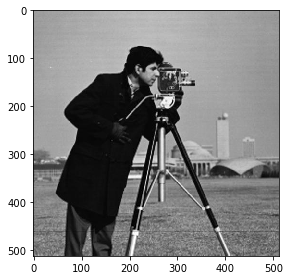

In [64]:
## -- Your code here -- ##
im=imread("camera.jpg")
imshow(im)
imsave("gouba.jpg",im);






In [3]:
print(im)

[[156 157 158 ... 151 151 151]
 [159 158 157 ... 152 152 152]
 [161 159 157 ... 154 154 154]
 ...
 [121 123 127 ... 123 113 107]
 [121 122 123 ... 123 116 112]
 [120 124 127 ... 121 116 115]]


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

(659, 960, 3) uint8 255
(512, 512) uint8 0
107
0


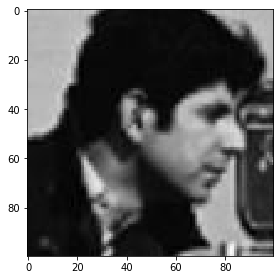

In [66]:
import numpy as np
## -- Your code here -- ##
im_color=imread("road.jpg")
im_gray=imread("camera.jpg")
print(im_color.shape,im_color.dtype,im_color.max())
print(im_gray.shape,im_color.dtype,im_color.min())
print(im_gray[500,500]); #0 correspond to black pixels and 255 correspond to white pixels
print(np.min(im_gray)) # 这行代码等于 im_gray.min()
imshow(im[80:180,175:275])

206 206
[[ 12  15  41 ... 179 168 167]
 [ 14  25  67 ... 167 169 166]
 [ 29  96 148 ... 173 169 169]
 ...
 [ 13  13  19 ... 133 135 147]
 [ 13   9  12 ... 127 129 153]
 [ 12   7  14 ... 126 130 148]]


<IPython.core.display.Javascript object>


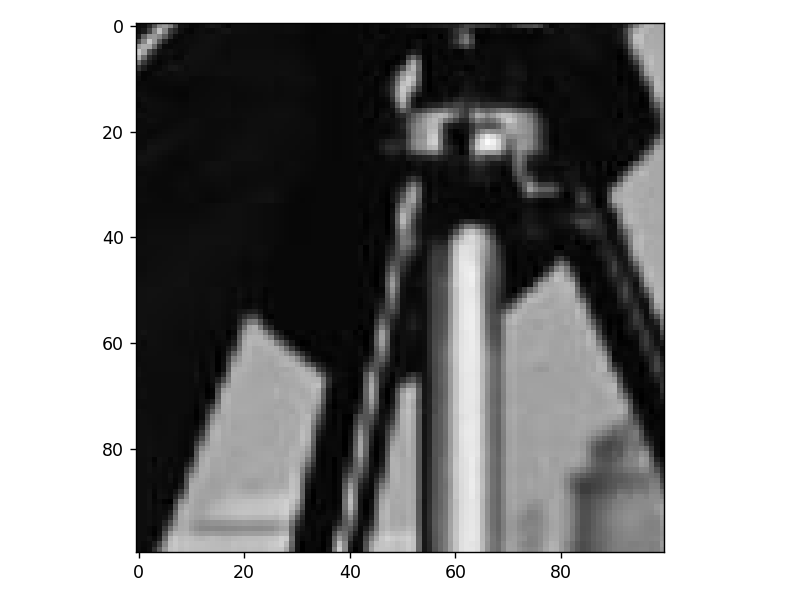

(100, 100)


In [5]:
centerx, centery = [int(im_gray.shape[0] / 2) - 50, int(im_gray.shape[1] / 2) - 50]
new_im = im[centerx:centerx + 100, centery:centery + 100]
print(centerx,centery)
print(new_im)
plt.figure()
imshow(new_im)
plt.show()
print(new_im.shape);

**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

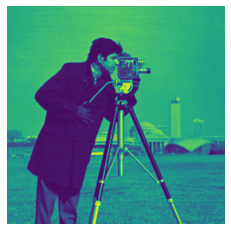

In [30]:
from matplotlib import pyplot as plt
## -- Your code here -- ##
im=imread("camera.jpg")
plt.figure()
plt.imshow(im)  #The image is colorful because of the default colormap, we can force it to display the image correctly by using cmap.
plt.axis("off")
plt.show()

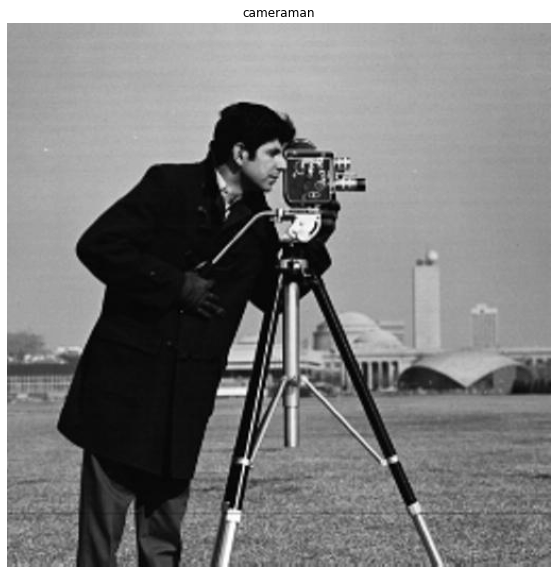

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(im,cmap=plt.cm.gray,vmin=0,vmax=255) #by default matplotlib uses the lowest value in the image as black and the highest as white.
plt.title("cameraman")
plt.axis("off")
plt.show()

In [73]:
print(im)
print(im.shape)
print(im[100,110]);

[[156 157 158 ... 151 151 151]
 [159 158 157 ... 152 152 152]
 [161 159 157 ... 154 154 154]
 ...
 [121 123 127 ... 123 113 107]
 [121 122 123 ... 123 116 112]
 [120 124 127 ... 121 116 115]]
(512, 512)
178


In [74]:
h=[0 for v in range(256)] #The length of the histogram correspond to the number of possible values in an image.
print(h)   #create 256-length vector filled with 0s


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [75]:
#另一种方法
hist=np.zeros((256,)).astype('int')
print(hist)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
for y in range(im.shape[0]):                  #for v in range (0,256):
    for x in range(im.shape[1]):              #h[v]=(im==v).sum()      
        h[im[y,x]]+=1                         #numpy is powerful, (im==v) does an element-wise comparison between the array im and the
print(h)                                      #scalar v. It create a new array of the same size as im, and fill it with True(1) wherever
                                              #the pixel value of im was equal to v and with False(0) everywhere else.

[207, 90, 143, 184, 247, 365, 617, 1408, 3236, 4657, 3874, 5044, 5873, 6107, 6026, 4381, 2902, 1504, 861, 648, 566, 506, 479, 459, 397, 398, 390, 397, 360, 370, 333, 389, 368, 366, 385, 395, 359, 363, 408, 354, 334, 365, 364, 326, 307, 277, 255, 295, 261, 250, 249, 271, 259, 270, 254, 301, 279, 277, 316, 295, 310, 333, 330, 340, 313, 269, 255, 241, 229, 248, 234, 216, 222, 243, 220, 222, 198, 188, 204, 209, 234, 216, 235, 210, 257, 250, 239, 274, 312, 291, 303, 334, 371, 394, 429, 461, 490, 517, 571, 577, 628, 698, 735, 789, 791, 834, 884, 951, 1037, 1020, 1017, 1104, 1109, 1201, 1210, 1273, 1279, 1352, 1339, 1415, 1501, 1495, 1518, 1549, 1554, 1631, 1636, 1670, 1712, 1705, 1771, 1626, 1664, 1634, 1585, 1713, 1566, 1559, 1487, 1397, 1501, 1346, 1412, 1471, 1629, 1888, 2007, 2041, 2126, 2239, 2272, 2076, 2086, 2165, 2107, 2491, 2675, 2807, 3016, 3348, 3584, 4228, 4884, 4848, 4794, 4463, 4193, 4014, 3694, 3308, 2936, 2724, 2752, 2616, 2556, 2584, 2590, 2654, 2789, 2723, 2815, 2696, 2553,

In [77]:
for v in range (0,256):
    hist[v]=(im==v).sum()      
#numpy is powerful, (im==v) does an element-wise comparison between the array im and the scalar v. It create a new array of the
#same size as im, and fill it with True(1) wherever the pixel value of im was equal to v and with False(0) everywhere else.
print(hist)

[ 207   90  143  184  247  365  617 1408 3236 4657 3874 5044 5873 6107
 6026 4381 2902 1504  861  648  566  506  479  459  397  398  390  397
  360  370  333  389  368  366  385  395  359  363  408  354  334  365
  364  326  307  277  255  295  261  250  249  271  259  270  254  301
  279  277  316  295  310  333  330  340  313  269  255  241  229  248
  234  216  222  243  220  222  198  188  204  209  234  216  235  210
  257  250  239  274  312  291  303  334  371  394  429  461  490  517
  571  577  628  698  735  789  791  834  884  951 1037 1020 1017 1104
 1109 1201 1210 1273 1279 1352 1339 1415 1501 1495 1518 1549 1554 1631
 1636 1670 1712 1705 1771 1626 1664 1634 1585 1713 1566 1559 1487 1397
 1501 1346 1412 1471 1629 1888 2007 2041 2126 2239 2272 2076 2086 2165
 2107 2491 2675 2807 3016 3348 3584 4228 4884 4848 4794 4463 4193 4014
 3694 3308 2936 2724 2752 2616 2556 2584 2590 2654 2789 2723 2815 2696
 2553 2348 2262 1970 1611 1158  824  522  354  269  249  208  190  212
  167 

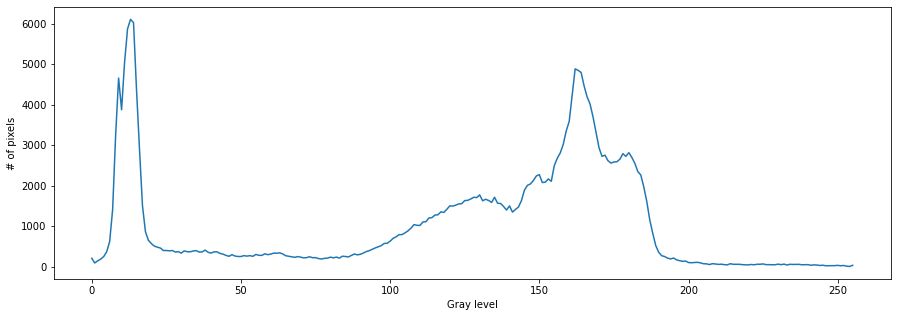

In [60]:
plt.figure(figsize=(15,5))
plt.plot(h)
plt.xlabel('Gray level')
plt.ylabel('# of pixels')
plt.show()

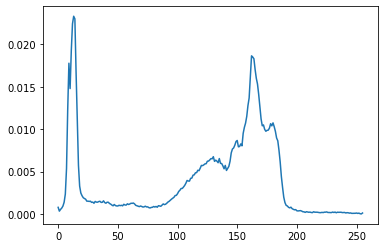

In [78]:
new_h=[x/512/512 for x in h]  #norm_hist=hist/hist.sum()
plt.figure()
plt.plot(new_h)
plt.show()


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
1. What is the average gray value of the sky ?
1. Is there more 'cameraman' pixels than 'sky' pixels ?

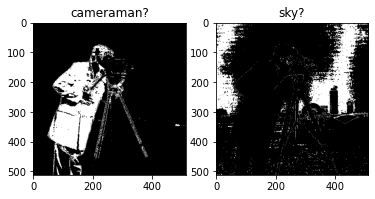

In [79]:
#We can see there are 2 great "peaks"：at around 15(almost black) and at around 160(almost light gray).
dark_image=(im<=20)*(im>=10)
light_image=(im<=165)*(im>=155)

plt.figure()
plt.subplot(1,2,1) #subplots can show multiple images on the same figure
plt.imshow(dark_image,cmap=plt.cm.gray)
plt.title('cameraman?')
plt.subplot(1,2,2)
plt.imshow(light_image,cmap=plt.cm.gray)
plt.title('sky?')
plt.show()

Compute and plot the **cumulated histogram**.

<IPython.core.display.Javascript object>


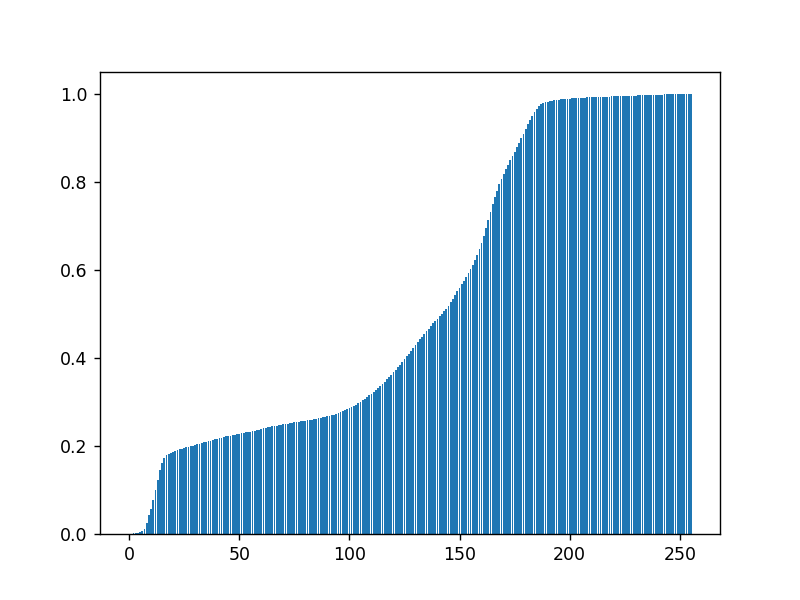

In [11]:
## -- Your code here -- ##
cumul_h=np.zeros((256,))
for i in range(256):
    cumul_h[i]=new_h[i]+cumul_h[i-1]
    
plt.figure()
plt.bar(range(256),cumul_h)
plt.show()

**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [12]:
import numpy as np
# -- Your code here -- #
def entropy(im):
    p=np.array([(im==v).sum() for v in range(256)])
    p=p/p.sum()
    e=-(p*np.log2(p)).sum()
    return e 

<IPython.core.display.Javascript object>


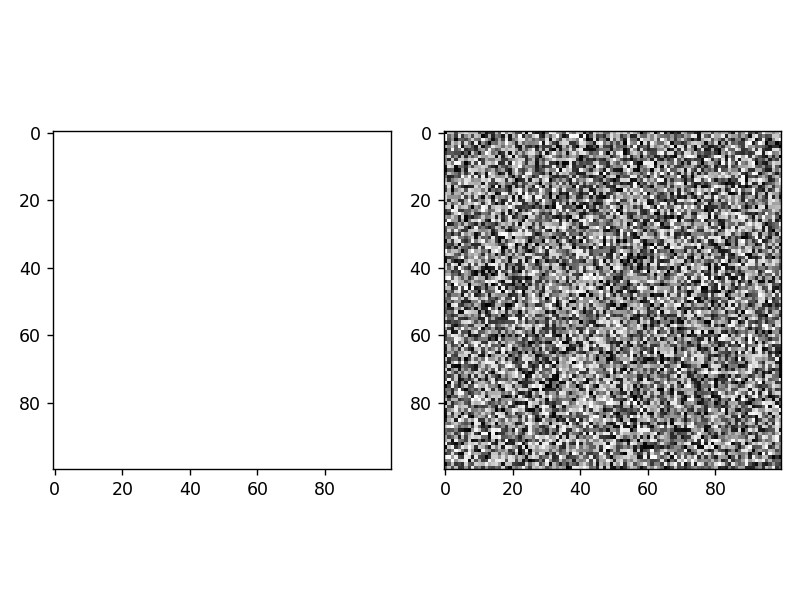

In [13]:
%matplotlib notebook
from matplotlib import pyplot as plt
from skimage.io import imread,imshow,imsave

a=(np.ones((100,100))*255).astype('uint8')
b=(np.random.random((100,100))*256).astype('uint8')

plt.figure()
plt.subplot(1,2,1)
imshow(a)
plt.subplot(1,2,2)
imshow(b)
plt.show()

<IPython.core.display.Javascript object>


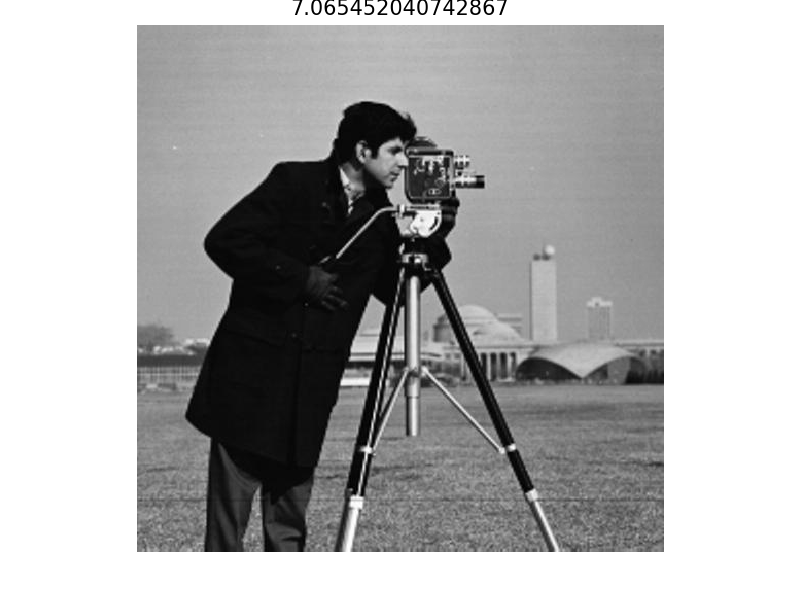

In [14]:
im=imread("camera.jpg")

plt.figure()
imshow(im)
plt.axis('off')
plt.title(entropy(im))
plt.show()


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

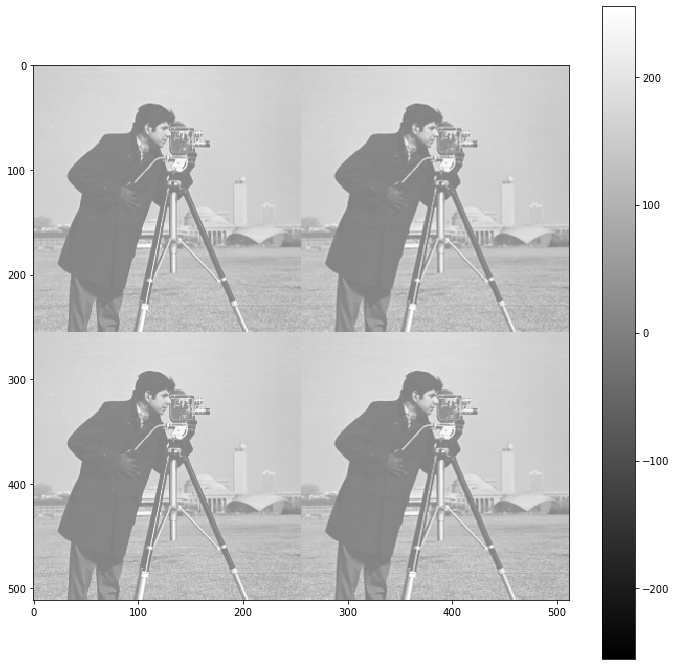

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im):
    a = im[0:-1:2,0:-1:2]
    b = im[0:-1:2,1::2]
    c = im[1::2,0:-1:2]
    d = im[1::2,1::2]
    
    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=-255, vmax=255)
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [16]:

# -- Your code here -- #


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

In [17]:

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

In [ ]:
from skimage.feature import greycomatrix

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

In [ ]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

In [ ]:

# -- Your code here -- #


**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


In [ ]:

# -- Your code here -- #
